In [22]:
import os
import cv2
import zipfile
import random
import shutil

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib

from random import randint
from shutil import copyfile
from google.colab import files



**To import our Dataset from Google Drive, we have to mount our Google Drive into Colab first**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Extract the Dataset.zip into /tmp/Dataset/ directory**

In [3]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

len(os.listdir('/tmp/Dataset/'))

14

**Generate name of classes, and count images from each class**

In [4]:
CLASSES, images = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('/tmp/Dataset'):
    f = os.path.basename(root)    # get class name - Bacan, Kalimaya, etc    
        
    if len(files) > 0:
        images.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
class_count = len(CLASSES) # number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(images)))

14 classes with 1400 images in total


**Create source path for each class**

In [5]:
source_path = '/tmp/Dataset'

source_path_bacan = os.path.join(source_path, 'Bacan')
source_path_batugiok = os.path.join(source_path, 'Batu_Giok')
source_path_biosolar = os.path.join(source_path, 'Biosolar')
source_path_merahdelima = os.path.join(source_path, 'Merah_Delima')
source_path_sungaidareh = os.path.join(source_path, 'Sungai_Dareh')
source_path_kalimaya = os.path.join(source_path, 'Kalimaya')
source_path_kalsedon = os.path.join(source_path, 'Kalsedon')
source_path_kecubung = os.path.join(source_path, 'Kecubung')
source_path_pirus = os.path.join(source_path, 'Pirus')
source_path_safir = os.path.join(source_path, 'Safir')
source_path_sulaiman = os.path.join(source_path, 'Sulaiman')
source_path_tapakjalak = os.path.join(source_path, 'Tapak_Jalak')
source_path_topazkuning = os.path.join(source_path, 'Topaz_Kuning')
source_path_zamrud = os.path.join(source_path, 'Zamrud')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_bacan))} images of Bacan.")
print(f"There are {len(os.listdir(source_path_batugiok))} images of Batu Giok.")
print(f"There are {len(os.listdir(source_path_biosolar))} images of Biosolar.")
print(f"There are {len(os.listdir(source_path_merahdelima))} images of Merah Delima.")
print(f"There are {len(os.listdir(source_path_sungaidareh))} images of Sungai Dareh.")
print(f"There are {len(os.listdir(source_path_kalimaya))} images of Kalimaya.")
print(f"There are {len(os.listdir(source_path_kalsedon))} images of Kalsedon.")
print(f"There are {len(os.listdir(source_path_kecubung))} images of Kecubung.")
print(f"There are {len(os.listdir(source_path_pirus))} images of Pirus.")
print(f"There are {len(os.listdir(source_path_safir))} images of Safir.")
print(f"There are {len(os.listdir(source_path_sulaiman))} images of Sulaiman.")
print(f"There are {len(os.listdir(source_path_tapakjalak))} images of Tapak Jalak.")
print(f"There are {len(os.listdir(source_path_topazkuning))} images of Topaz Kuning.")
print(f"There are {len(os.listdir(source_path_zamrud))} images of Zamrud.")

There are 100 images of Bacan.
There are 100 images of Batu Giok.
There are 100 images of Biosolar.
There are 100 images of Merah Delima.
There are 100 images of Sungai Dareh.
There are 100 images of Kalimaya.
There are 100 images of Kalsedon.
There are 100 images of Kecubung.
There are 100 images of Pirus.
There are 100 images of Safir.
There are 100 images of Sulaiman.
There are 100 images of Tapak Jalak.
There are 100 images of Topaz Kuning.
There are 100 images of Zamrud.


**Create Training & Testing directory for each class**

In [6]:
# Define root directory
new_dir = '/tmp/batuakik'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(new_dir):
  shutil.rmtree(new_dir)

# Create_train_test_dirs
def create_train_test_dirs(root_path):
  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  # CREATE TRAINING & TESTING PATH
  training_path = os.path.join(root_path, "training")
  os.makedirs(training_path)

  testing_path = os.path.join(root_path, "testing")
  os.makedirs(testing_path)

  # CREATE TRAINING PATH FOR EACH CLASSES
  training_bacan = os.path.join(training_path, "bacan")
  os.makedirs(training_bacan)
  training_batu_giok = os.path.join(training_path, "batu_giok")
  os.makedirs(training_batu_giok)
  training_biosolar = os.path.join(training_path, "biosolar")
  os.makedirs(training_biosolar)
  training_merah_delima = os.path.join(training_path, "merah_delima")
  os.makedirs(training_merah_delima)
  training_sungai_dareh = os.path.join(training_path, "sungai_dareh")
  os.makedirs(training_sungai_dareh)
  training_kalimaya = os.path.join(training_path, "kalimaya")
  os.makedirs(training_kalimaya)
  training_kalsedon = os.path.join(training_path, "kalsedon")
  os.makedirs(training_kalsedon)
  training_kecubung = os.path.join(training_path, "kecubung")
  os.makedirs(training_kecubung)
  training_pirus = os.path.join(training_path, "pirus")
  os.makedirs(training_pirus)
  training_safir = os.path.join(training_path, "safir")
  os.makedirs(training_safir)
  training_sulaiman = os.path.join(training_path, "sulaiman")
  os.makedirs(training_sulaiman)
  training_tapak_jalak = os.path.join(training_path, "tapak_jalak")
  os.makedirs(training_tapak_jalak)
  training_topaz_kuning = os.path.join(training_path, "topaz_kuning")
  os.makedirs(training_topaz_kuning)
  training_zamrud = os.path.join(training_path, "zamrud")
  os.makedirs(training_zamrud)

  # CREATE TESTING PATH FOR EACH CLASSES
  testing_bacan = os.path.join(testing_path, "bacan")
  os.makedirs(testing_bacan)
  testing_batu_giok = os.path.join(testing_path, "batu_giok")
  os.makedirs(testing_batu_giok)
  testing_biosolar = os.path.join(testing_path, "biosolar")
  os.makedirs(testing_biosolar)
  testing_merah_delima = os.path.join(testing_path, "merah_delima")
  os.makedirs(testing_merah_delima)
  testing_sungai_dareh = os.path.join(testing_path, "sungai_dareh")
  os.makedirs(testing_sungai_dareh)
  testing_kalimaya = os.path.join(testing_path, "kalimaya")
  os.makedirs(testing_kalimaya)
  testing_kalsedon = os.path.join(testing_path, "kalsedon")
  os.makedirs(testing_kalsedon)
  testing_kecubung = os.path.join(testing_path, "kecubung")
  os.makedirs(testing_kecubung)
  testing_pirus = os.path.join(testing_path, "pirus")
  os.makedirs(testing_pirus)
  testing_safir = os.path.join(testing_path, "safir")
  os.makedirs(testing_safir)
  testing_sulaiman = os.path.join(testing_path, "sulaiman")
  os.makedirs(testing_sulaiman)
  testing_tapak_jalak = os.path.join(testing_path, "tapak_jalak")
  os.makedirs(testing_tapak_jalak)
  testing_topaz_kuning = os.path.join(testing_path, "topaz_kuning")
  os.makedirs(testing_topaz_kuning)
  testing_zamrud = os.path.join(testing_path, "zamrud")
  os.makedirs(testing_zamrud)

try:
  create_train_test_dirs(root_path=new_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")


In [7]:
# Test your create_train_test_dirs function

for newdir, dirs, files in os.walk(new_dir):
    for subdir in dirs:
        print(os.path.join(newdir, subdir))

/tmp/batuakik/testing
/tmp/batuakik/training
/tmp/batuakik/testing/tapak_jalak
/tmp/batuakik/testing/sulaiman
/tmp/batuakik/testing/pirus
/tmp/batuakik/testing/merah_delima
/tmp/batuakik/testing/sungai_dareh
/tmp/batuakik/testing/bacan
/tmp/batuakik/testing/safir
/tmp/batuakik/testing/kecubung
/tmp/batuakik/testing/biosolar
/tmp/batuakik/testing/zamrud
/tmp/batuakik/testing/topaz_kuning
/tmp/batuakik/testing/kalimaya
/tmp/batuakik/testing/kalsedon
/tmp/batuakik/testing/batu_giok
/tmp/batuakik/training/tapak_jalak
/tmp/batuakik/training/sulaiman
/tmp/batuakik/training/pirus
/tmp/batuakik/training/merah_delima
/tmp/batuakik/training/sungai_dareh
/tmp/batuakik/training/bacan
/tmp/batuakik/training/safir
/tmp/batuakik/training/kecubung
/tmp/batuakik/training/biosolar
/tmp/batuakik/training/zamrud
/tmp/batuakik/training/topaz_kuning
/tmp/batuakik/training/kalimaya
/tmp/batuakik/training/kalsedon
/tmp/batuakik/training/batu_giok


**Create split_data function (90% for Training, 10% for Testing)**

In [8]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  files = []
  for filename in os.listdir(SOURCE):
      file = SOURCE + filename
      if os.path.getsize(file) > 0:
          files.append(filename)
      else:
          print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
      this_file = SOURCE + filename
      destination = TRAINING + filename
      copyfile(this_file, destination)

  for filename in testing_set:
      this_file = SOURCE + filename
      destination = TESTING + filename
      copyfile(this_file, destination)

**Create Training & Testing directory (In batuakik directory)**

In [9]:
# Test your split_data function

# Define paths
BACAN_SOURCE_DIR = "/tmp/Dataset/Bacan/"
BATUGIOK_SOURCE_DIR = "/tmp/Dataset/Batu_Giok/"
BIOSOLAR_SOURCE_DIR = "/tmp/Dataset/Biosolar/"
MERAHDELIMA_SOURCE_DIR = "/tmp/Dataset/Merah_Delima/"
SUNGAIDAREH_SOURCE_DIR = "/tmp/Dataset/Sungai_Dareh/"
KALIMAYA_SOURCE_DIR = "/tmp/Dataset/Kalimaya/"
KALSEDON_SOURCE_DIR = "/tmp/Dataset/Kalsedon/"
KECUBUNG_SOURCE_DIR = "/tmp/Dataset/Kecubung/"
PIRUS_SOURCE_DIR = "/tmp/Dataset/Pirus/"
SAFIR_SOURCE_DIR = "/tmp/Dataset/Safir/"
SULAIMAN_SOURCE_DIR = "/tmp/Dataset/Sulaiman/"
TAPAKJALAK_SOURCE_DIR = "/tmp/Dataset/Tapak_Jalak/"
TOPAZKUNING_SOURCE_DIR = "/tmp/Dataset/Topaz_Kuning/"
ZAMRUD_SOURCE_DIR = "/tmp/Dataset/Zamrud/"

TRAINING_DIR = "/tmp/batuakik/training/"
TESTING_DIR = "/tmp/batuakik/testing/"

TRAINING_BACAN_DIR = os.path.join(TRAINING_DIR, "bacan/")
TESTING_BACAN_DIR = os.path.join(TESTING_DIR, "bacan/")

TRAINING_BATUGIOK_DIR = os.path.join(TRAINING_DIR, "batu_giok/")
TESTING_BATUGIOK_DIR = os.path.join(TESTING_DIR, "batu_giok/")

TRAINING_BIOSOLAR_DIR = os.path.join(TRAINING_DIR, "biosolar/")
TESTING_BIOSOLAR_DIR = os.path.join(TESTING_DIR, "biosolar/")

TRAINING_MERAHDELIMA_DIR = os.path.join(TRAINING_DIR, "merah_delima/")
TESTING_MERAHDELIMA_DIR = os.path.join(TESTING_DIR, "merah_delima/")

TRAINING_SUNGAIDAREH_DIR = os.path.join(TRAINING_DIR, "sungai_dareh/")
TESTING_SUNGAIDAREH_DIR = os.path.join(TESTING_DIR, "sungai_dareh/")

TRAINING_KALIMAYA_DIR = os.path.join(TRAINING_DIR, "kalimaya/")
TESTING_KALIMAYA_DIR = os.path.join(TESTING_DIR, "kalimaya/")

TRAINING_KALSEDON_DIR = os.path.join(TRAINING_DIR, "kalsedon/")
TESTING_KALSEDON_DIR = os.path.join(TESTING_DIR, "kalsedon/")

TRAINING_KECUBUNG_DIR = os.path.join(TRAINING_DIR, "kecubung/")
TESTING_KECUBUNG_DIR = os.path.join(TESTING_DIR, "kecubung/")

TRAINING_PIRUS_DIR = os.path.join(TRAINING_DIR, "pirus/")
TESTING_PIRUS_DIR = os.path.join(TESTING_DIR, "pirus/")

TRAINING_SAFIR_DIR = os.path.join(TRAINING_DIR, "safir/")
TESTING_SAFIR_DIR = os.path.join(TESTING_DIR, "safir/")

TRAINING_SULAIMAN_DIR = os.path.join(TRAINING_DIR, "sulaiman/")
TESTING_SULAIMAN_DIR = os.path.join(TESTING_DIR, "sulaiman/")

TRAINING_TAPAKJALAK_DIR = os.path.join(TRAINING_DIR, "tapak_jalak/")
TESTING_TAPAKJALAK_DIR = os.path.join(TESTING_DIR, "tapak_jalak/")

TRAINING_TOPAZKUNING_DIR = os.path.join(TRAINING_DIR, "topaz_kuning/")
TESTING_TOPAZKUNING_DIR = os.path.join(TESTING_DIR, "topaz_kuning/")

TRAINING_ZAMRUD_DIR = os.path.join(TRAINING_DIR, "zamrud/")
TESTING_ZAMRUD_DIR = os.path.join(TESTING_DIR, "zamrud/")

# Empty directories in case you run this cell multiple times

# TRAINING
if len(os.listdir(TRAINING_BACAN_DIR)) > 0:
  for file in os.scandir(TRAINING_BACAN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BATUGIOK_DIR)) > 0:
  for file in os.scandir(TRAINING_BATUGIOK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BIOSOLAR_DIR)) > 0:
  for file in os.scandir(TRAINING_BIOSOLAR_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_MERAHDELIMA_DIR)) > 0:
  for file in os.scandir(TRAINING_MERAHDELIMA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SUNGAIDAREH_DIR)) > 0:
  for file in os.scandir(TRAINING_SUNGAIDAREH_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KALIMAYA_DIR)) > 0:
  for file in os.scandir(TRAINING_KALIMAYA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KALSEDON_DIR)) > 0:
  for file in os.scandir(TRAINING_KALSEDON_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KECUBUNG_DIR)) > 0:
  for file in os.scandir(TRAINING_KECUBUNG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PIRUS_DIR)) > 0:
  for file in os.scandir(TRAINING_PIRUS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SAFIR_DIR)) > 0:
  for file in os.scandir(TRAINING_SAFIR_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SULAIMAN_DIR)) > 0:
  for file in os.scandir(TRAINING_SULAIMAN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_TAPAKJALAK_DIR)) > 0:
  for file in os.scandir(TRAINING_TAPAKJALAK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_TOPAZKUNING_DIR)) > 0:
  for file in os.scandir(TRAINING_TOPAZKUNING_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_ZAMRUD_DIR)) > 0:
  for file in os.scandir(TRAINING_ZAMRUD_DIR):
    os.remove(file.path)

# TESTING
if len(os.listdir(TESTING_BACAN_DIR)) > 0:
  for file in os.scandir(TESTING_BACAN_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_BATUGIOK_DIR)) > 0:
  for file in os.scandir(TESTING_BATUGIOK_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_BIOSOLAR_DIR)) > 0:
  for file in os.scandir(TESTING_BIOSOLAR_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_MERAHDELIMA_DIR)) > 0:
  for file in os.scandir(TESTING_MERAHDELIMA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SUNGAIDAREH_DIR)) > 0:
  for file in os.scandir(TESTING_SUNGAIDAREH_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_KALIMAYA_DIR)) > 0:
  for file in os.scandir(TESTING_KALIMAYA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_KALSEDON_DIR)) > 0:
  for file in os.scandir(TESTING_KALSEDON_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_KECUBUNG_DIR)) > 0:
  for file in os.scandir(TESTING_KECUBUNG_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_PIRUS_DIR)) > 0:
  for file in os.scandir(TESTING_PIRUS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SAFIR_DIR)) > 0:
  for file in os.scandir(TESTING_SAFIR_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SULAIMAN_DIR)) > 0:
  for file in os.scandir(TESTING_SULAIMAN_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_TAPAKJALAK_DIR)) > 0:
  for file in os.scandir(TESTING_TAPAKJALAK_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_TOPAZKUNING_DIR)) > 0:
  for file in os.scandir(TESTING_TOPAZKUNING_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ZAMRUD_DIR)) > 0:
  for file in os.scandir(TESTING_ZAMRUD_DIR):
    os.remove(file.path)

**Testing split_data function**

In [10]:
# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(BACAN_SOURCE_DIR, TRAINING_BACAN_DIR, TESTING_BACAN_DIR, split_size)
split_data(BATUGIOK_SOURCE_DIR, TRAINING_BATUGIOK_DIR, TESTING_BATUGIOK_DIR, split_size)
split_data(BIOSOLAR_SOURCE_DIR, TRAINING_BIOSOLAR_DIR, TESTING_BIOSOLAR_DIR, split_size)
split_data(MERAHDELIMA_SOURCE_DIR, TRAINING_MERAHDELIMA_DIR, TESTING_MERAHDELIMA_DIR, split_size)
split_data(SUNGAIDAREH_SOURCE_DIR, TRAINING_SUNGAIDAREH_DIR, TESTING_SUNGAIDAREH_DIR, split_size)
split_data(KALIMAYA_SOURCE_DIR, TRAINING_KALIMAYA_DIR, TESTING_KALIMAYA_DIR, split_size)
split_data(KALSEDON_SOURCE_DIR, TRAINING_KALSEDON_DIR, TESTING_KALSEDON_DIR, split_size)
split_data(KECUBUNG_SOURCE_DIR, TRAINING_KECUBUNG_DIR, TESTING_KECUBUNG_DIR, split_size)
split_data(PIRUS_SOURCE_DIR, TRAINING_PIRUS_DIR, TESTING_PIRUS_DIR, split_size)
split_data(SAFIR_SOURCE_DIR, TRAINING_SAFIR_DIR, TESTING_SAFIR_DIR, split_size)
split_data(SULAIMAN_SOURCE_DIR, TRAINING_SULAIMAN_DIR, TESTING_SULAIMAN_DIR, split_size)
split_data(TAPAKJALAK_SOURCE_DIR, TRAINING_TAPAKJALAK_DIR, TESTING_TAPAKJALAK_DIR, split_size)
split_data(TOPAZKUNING_SOURCE_DIR, TRAINING_TOPAZKUNING_DIR, TESTING_TOPAZKUNING_DIR, split_size)
split_data(ZAMRUD_SOURCE_DIR, TRAINING_ZAMRUD_DIR, TESTING_ZAMRUD_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\nThere are {len(os.listdir(TRAINING_BACAN_DIR))} images of Bacan for training")
print(f"There are {len(os.listdir(TRAINING_BATUGIOK_DIR))} images of Batugiok for training")
print(f"There are {len(os.listdir(TRAINING_BIOSOLAR_DIR))} images of Biosolar for training")
print(f"There are {len(os.listdir(TRAINING_MERAHDELIMA_DIR))} images of Merah Delima for training")
print(f"There are {len(os.listdir(TRAINING_SUNGAIDAREH_DIR))} images of Sungai Dareh for training")
print(f"There are {len(os.listdir(TRAINING_KALIMAYA_DIR))} images of Kalimaya for training")
print(f"There are {len(os.listdir(TRAINING_KALSEDON_DIR))} images of Kalsedon for training")
print(f"There are {len(os.listdir(TRAINING_KECUBUNG_DIR))} images of Kecubung for training")
print(f"There are {len(os.listdir(TRAINING_PIRUS_DIR))} images of Pirus for training")
print(f"There are {len(os.listdir(TRAINING_SAFIR_DIR))} images of Safir for training")
print(f"There are {len(os.listdir(TRAINING_SULAIMAN_DIR))} images of Sulaiman for training")
print(f"There are {len(os.listdir(TRAINING_TAPAKJALAK_DIR))} images of Tapak Jalak for training")
print(f"There are {len(os.listdir(TRAINING_TOPAZKUNING_DIR))} images of Topaz Kuning for training")
print(f"There are {len(os.listdir(TRAINING_ZAMRUD_DIR))} images of Zamrud for training")

print(f"\nThere are {len(os.listdir(TESTING_BACAN_DIR))} images of bacan for testing")
print(f"There are {len(os.listdir(TESTING_BATUGIOK_DIR))} images of Batugiok for testing")
print(f"There are {len(os.listdir(TESTING_BIOSOLAR_DIR))} images of Biosolar for testing")
print(f"There are {len(os.listdir(TESTING_MERAHDELIMA_DIR))} images of merah delima for testing")
print(f"There are {len(os.listdir(TESTING_SUNGAIDAREH_DIR))} images of sungai dareh for testing")
print(f"There are {len(os.listdir(TESTING_KALIMAYA_DIR))} images of Kalimaya for testing")
print(f"There are {len(os.listdir(TESTING_KALSEDON_DIR))} images of Kalsedon for testing")
print(f"There are {len(os.listdir(TESTING_KECUBUNG_DIR))} images of Kecubung for testing")
print(f"There are {len(os.listdir(TESTING_PIRUS_DIR))} images of Pirus for testing")
print(f"There are {len(os.listdir(TESTING_SAFIR_DIR))} images of Safir for testing")
print(f"There are {len(os.listdir(TESTING_SULAIMAN_DIR))} images of Sulaiman for testing")
print(f"There are {len(os.listdir(TESTING_TAPAKJALAK_DIR))} images of Tapak Jalak for testing")
print(f"There are {len(os.listdir(TESTING_TOPAZKUNING_DIR))} images of Topaz Kuning for testing")
print(f"There are {len(os.listdir(TESTING_ZAMRUD_DIR))} images of Zamrud for testing")


There are 90 images of Bacan for training
There are 90 images of Batugiok for training
There are 90 images of Biosolar for training
There are 90 images of Merah Delima for training
There are 90 images of Sungai Dareh for training
There are 90 images of Kalimaya for training
There are 90 images of Kalsedon for training
There are 90 images of Kecubung for training
There are 90 images of Pirus for training
There are 90 images of Safir for training
There are 90 images of Sulaiman for training
There are 90 images of Tapak Jalak for training
There are 90 images of Topaz Kuning for training
There are 90 images of Zamrud for training

There are 10 images of bacan for testing
There are 10 images of Batugiok for testing
There are 10 images of Biosolar for testing
There are 10 images of merah delima for testing
There are 10 images of sungai dareh for testing
There are 10 images of Kalimaya for testing
There are 10 images of Kalsedon for testing
There are 10 images of Kecubung for testing
There a

**Create function to read images with its labels from directory**

In [11]:
img_width, img_height = 300, 300    # width and height of image

def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Bacan, Kalimaya, etc       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_width), int(img_height)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

**Shape of Train Images & Labels**

In [12]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

Train_Imgs, Train_Lbls = read_imgs_lbls(TRAINING_DIR)
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (1260, 300, 300, 3)
Shape of train labels: (1260,)


In [13]:
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

**Create Train & Validation Generator (with image augmentation)**

In [14]:
# train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # this is the augmentation configuration used for training
  train_datagen = ImageDataGenerator(rescale=1/255, 
                                     rotation_range=25,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.2,
                                     horizontal_flip=True)


  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='sparse',
                                                      target_size=(300, 300))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=5,
                                                                class_mode='sparse',
                                                                target_size=(300, 300))
  
  return train_generator, validation_generator

In [15]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 1260 images belonging to 14 classes.
Found 140 images belonging to 14 classes.


**Create Model**

In [16]:
# GRADED FUNCTION: create_model
def create_model():
  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(32, (3,3), input_shape=(300,300,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(14, activation="softmax"),
  ])

  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 

  return model


In [17]:
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
26/26 [==============================] - 283s 11s/step - loss: 2.2401 - accuracy: 0.2000 - val_loss: 1.5388 - val_accuracy: 0.4929
Epoch 2/10
26/26 [==============================] - 277s 11s/step - loss: 1.4379 - accuracy: 0.5071 - val_loss: 1.1532 - val_accuracy: 0.6000
Epoch 3/10
26/26 [==============================] - 295s 11s/step - loss: 1.1326 - accuracy: 0.5802 - val_loss: 1.2241 - val_accuracy: 0.5214
Epoch 4/10
26/26 [==============================] - 287s 11s/step - loss: 1.2486 - accuracy: 0.5635 - val_loss: 1.2130 - val_accuracy: 0.5286
Epoch 5/10
26/26 [==============================] - 295s 11s/step - loss: 0.9955 - accuracy: 0.6413 - val_loss: 0.9440 - val_accuracy: 0.6643
Epoch 6/10
26/26 [==============================] - 293s 11s/step - loss: 0.8634 - accuracy: 0.6889 - val_loss: 1.4805 - val_accuracy: 0.5429
Epoch 7/10
26/26 [==============================] - 286s 11s/step - loss: 0.9270 - accuracy: 0.6714 - val_loss: 0.7661 - val_accuracy: 0.7571
Epoch 

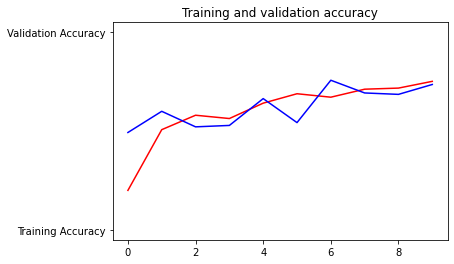

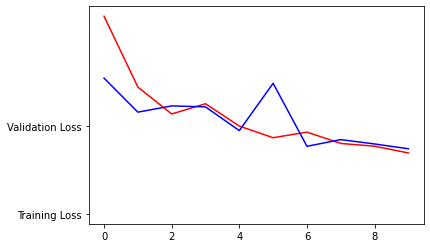

In [18]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']                 
val_acc=history.history['val_accuracy']   
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

**Generate a SavedModel**

In [19]:
# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format. 
export_dir = '/tmp/saved_model'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /tmp/saved_model/assets


**Convert the SavedModel to TFLite**

In [20]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

**Save & download the TFLite model**

In [23]:
tflite_model_file = pathlib.Path('/tmp/model.tflite')
tflite_model_file.write_bytes(tflite_model)

# Download the TFLite model file
files.download(tflite_model_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>